In [1]:
#install libraries and packages to use with environment for analysis

import pandas as pd
import numpy as np
import sklearn
import pylab
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
import statistics as stat

In [2]:
#import the telecommunications churn dataset csv file to be used. 
#view dataset to ensure proper loading.

data = pd.read_csv('churn_clean.csv')
pd.set_option('display.max_columns', None)
data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [3]:
#renaming unclear variables.
data = data.rename(columns = { "Item1": "Timely_Respd", "Item2": "Timely_Fixes",
                                "Item3": "Timely_Replc", "Item4": "Reliability", "Item5": "Options",
                                "Item6": "Respect_Resp", "Item7": "Courteous_Exch", 
                                "Item8": "Evidence_ActListen"})

In [4]:
data.shape

(10000, 50)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [6]:
# checking for duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
duplicates = data.duplicated('Customer_id')
data_duplicated = data[duplicates].sort_values(by='Customer_id')
print(data_duplicated[['Customer_id']])

Empty DataFrame
Columns: [Customer_id]
Index: []


In [8]:
data.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Timely_Respd,Timely_Fixes,Timely_Replc,Reliability,Options,Respect_Resp,Courteous_Exch,Evidence_ActListen
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [9]:
data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [10]:
data.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'],
      dtype='object')

In [11]:
#finding outliers

def find_outliers(df, var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    IQR = q3 - q1
    lowerbound = q1-(1.5*IQR)
    upperbound = q3+(1.5*IQR)
    outliers = df[var][((df[var] < (lowerbound)) | (df[var] > (upperbound)))]
    return outliers

#running created function on quantitative variables

outliers = find_outliers(data, 'Population')
print("number of outliers in Population: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Children')
print("number of outliers in Children: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Age')
print("number of outliers in Age: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Income')
print("number of outliers in Income: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Outage_sec_perweek')
print("number of outliers in Outage_sec_perweek: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Email')
print("number of outliers in Email: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Contacts')
print("number of outliers in Contacts: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Yearly_equip_failure')
print("number of outliers in Yearly_equip_failure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Tenure')
print("number of outliers in Tenure: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'MonthlyCharge')
print("number of outliers in MonthlyCharge: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))

outliers = find_outliers(data, 'Bandwidth_GB_Year')
print("number of outliers in Bandwidth_GB_Year: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))


number of outliers in Population: 937
max outlier value: 111850
min outlier value: 31816
number of outliers in Children: 401
max outlier value: 10
min outlier value: 8
number of outliers in Age: 0
max outlier value: nan
min outlier value: nan
number of outliers in Income: 336
max outlier value: 258900.7
min outlier value: 104362.5
number of outliers in Outage_sec_perweek: 76
max outlier value: 21.20723
min outlier value: 0.09974694
number of outliers in Email: 38
max outlier value: 23
min outlier value: 1
number of outliers in Contacts: 8
max outlier value: 7
min outlier value: 6
number of outliers in Yearly_equip_failure: 94
max outlier value: 6
min outlier value: 3
number of outliers in Tenure: 0
max outlier value: nan
min outlier value: nan
number of outliers in MonthlyCharge: 0
max outlier value: nan
min outlier value: nan
number of outliers in Bandwidth_GB_Year: 0
max outlier value: nan
min outlier value: nan


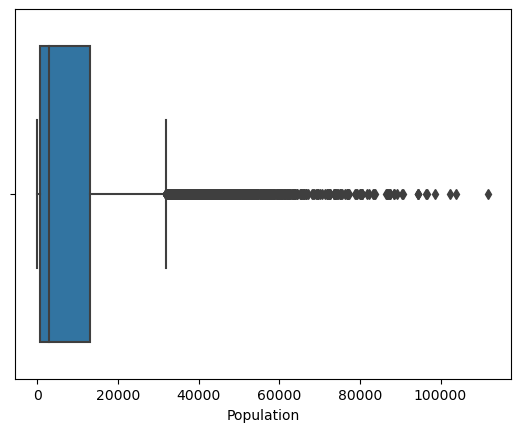

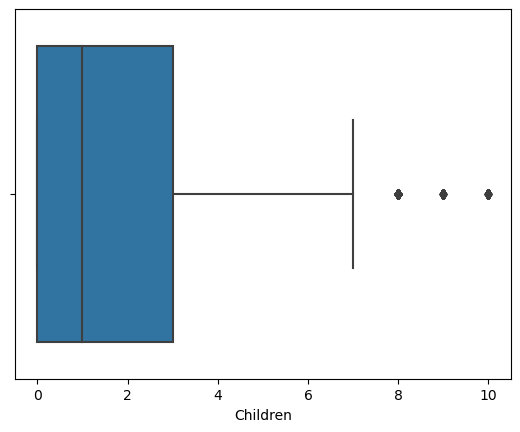

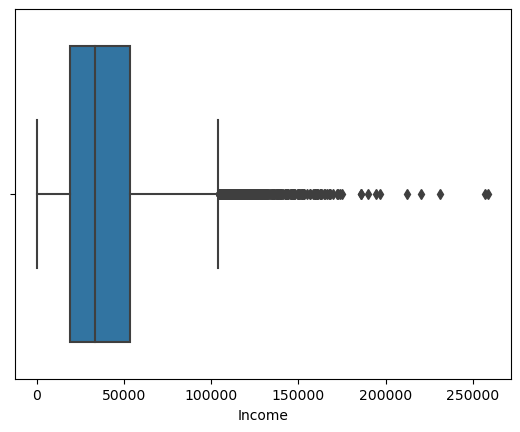

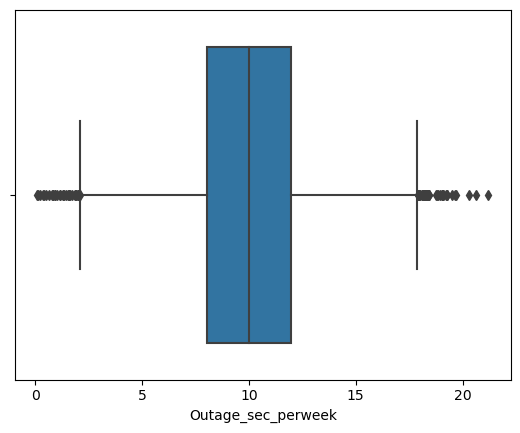

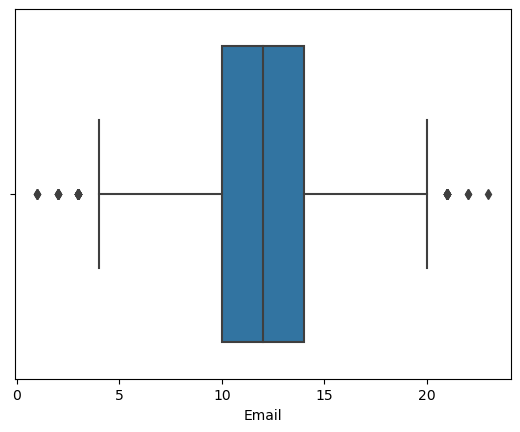

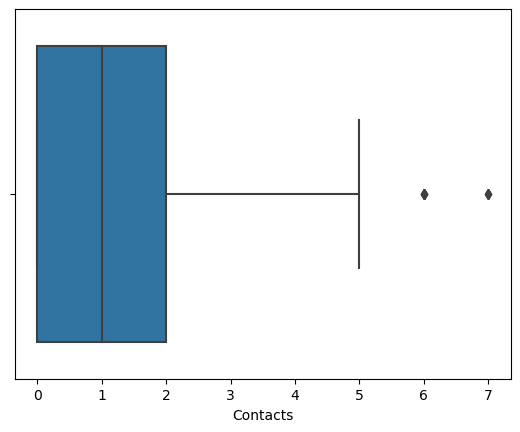

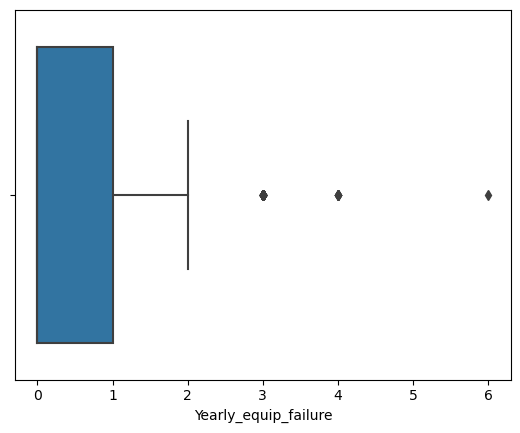

In [12]:
#boxplotting all variables showing outliers

boxplot=sns.boxplot(x='Population',data=data)
plt.show()
boxplot=sns.boxplot(x='Children',data=data)
plt.show()
boxplot=sns.boxplot(x='Income',data=data)
plt.show()
boxplot=sns.boxplot(x='Outage_sec_perweek',data=data)
plt.show()
boxplot=sns.boxplot(x='Email',data=data)
plt.show()
boxplot=sns.boxplot(x='Contacts',data=data)
plt.show()
boxplot=sns.boxplot(x='Yearly_equip_failure',data=data)
plt.show()

In [13]:
#treating outliers found.

def find_boundary(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    return lower , upper


lower_pop, upper_pop = find_boundary(data, 'Population' )
print("Upper limit for population is" , upper_pop)
print("Lower limit for population is" , lower_pop)
data.Population = np.where(data.Population > upper_pop, upper_pop,
                               np.where(data.Population < lower_pop, lower_pop, data.Population))

lower_kid, upper_kid = find_boundary(data, 'Children')
print("Upper limit for children is" , upper_kid)
print("Lower limit for children is" , lower_kid)
data.Children = np.where(data.Children > upper_kid, upper_kid,
                               np.where(data.Children < lower_kid, lower_kid, data.Children))

lower_inc, upper_inc = find_boundary(data, 'Income')
print("Upper limit for Income is" , upper_inc)
print("Lower limit for Income is" , lower_inc)
data.Income = np.where(data.Income > upper_inc, upper_inc,
                               np.where(data.Income < lower_inc, lower_inc, data.Income))

lower_osp, upper_osp = find_boundary(data, 'Outage_sec_perweek')
print("Upper limit for Outage_sec_perweek is" , upper_osp)
print("Lower limit for Outage_sec_perweek is" , lower_osp)
data.Outage_sec_perweek = np.where(data.Outage_sec_perweek > upper_osp, upper_osp,
                               np.where(data.Outage_sec_perweek < lower_osp, lower_osp, data.Outage_sec_perweek))

lower_eml, upper_eml = find_boundary(data, 'Email')
print("Upper limit for email is" , upper_eml)
print("Lower limit for email is" , lower_eml)
data.Email = np.where(data.Email > upper_eml, upper_eml,
                               np.where(data.Email < lower_eml, lower_eml, data.Email))

lower_contct, upper_contct = find_boundary(data, 'Contacts')
print("Upper limit for contacts is" , upper_contct)
print("Lower limit for contacts is" , lower_contct)
data.Contacts = np.where(data.Contacts > upper_contct, upper_contct,
                               np.where(data.Contacts < lower_contct, lower_contct, data.Contacts))

lower_yef, upper_yef = find_boundary(data, 'Yearly_equip_failure')
print("Upper limit for Yearly_equip_failure is" , upper_yef)
print("Lower limit for Yearly_equip_failure is" , lower_yef)
data.Yearly_equip_failure = np.where(data.Yearly_equip_failure > upper_yef, upper_yef,
                               np.where(data.Yearly_equip_failure < lower_yef, lower_yef, data.Yearly_equip_failure))


Upper limit for population is 31813.0
Lower limit for population is -17907.0
Upper limit for children is 7.5
Lower limit for children is -4.5
Upper limit for Income is 104278.34875
Lower limit for Income is -31807.46125
Upper limit for Outage_sec_perweek is 17.8963915
Lower limit for Outage_sec_perweek is 2.0913075
Upper limit for email is 20.0
Lower limit for email is 4.0
Upper limit for contacts is 5.0
Lower limit for contacts is -3.0
Upper limit for Yearly_equip_failure is 2.5
Lower limit for Yearly_equip_failure is -1.5


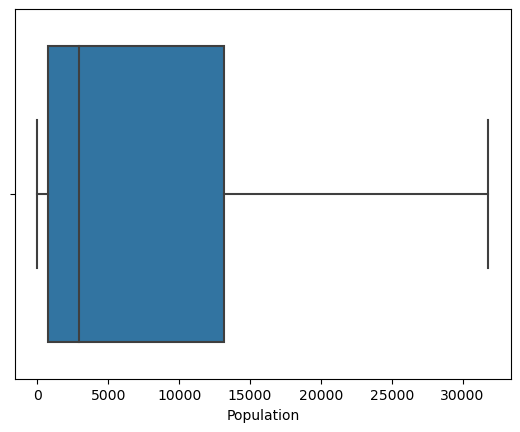

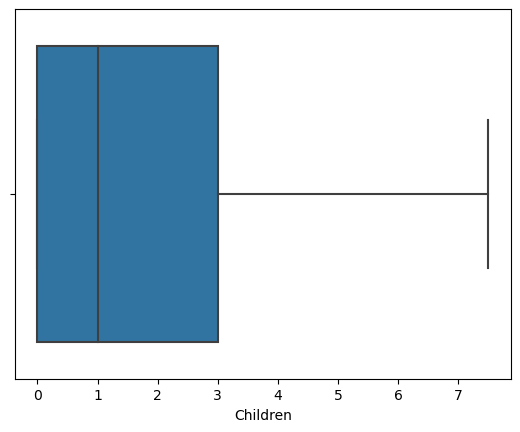

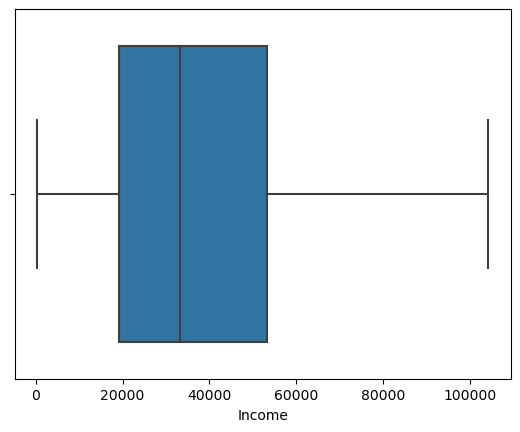

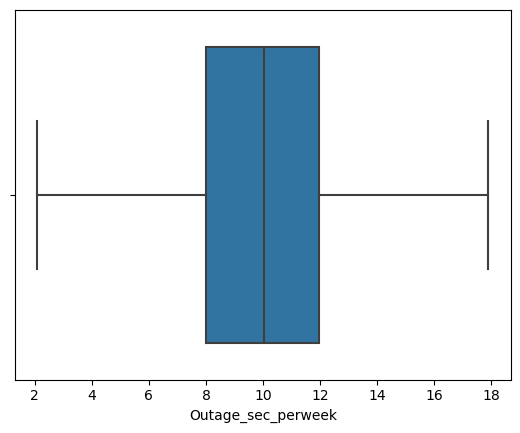

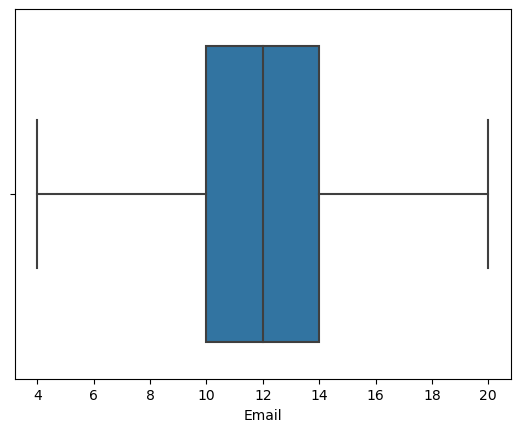

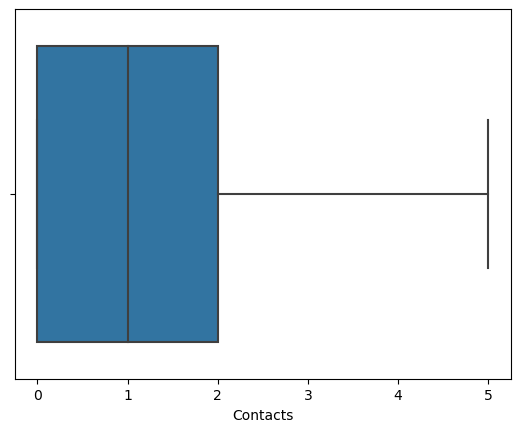

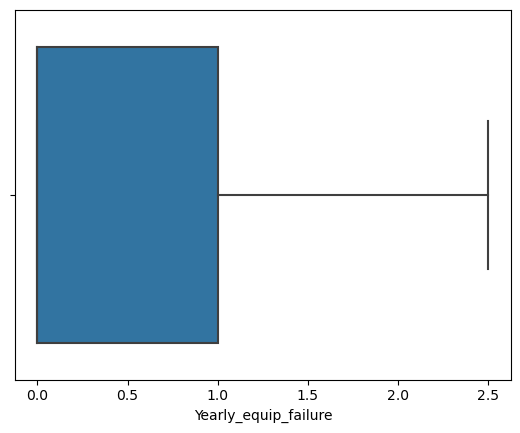

In [14]:
#re-boxplotting all variables showing outliers resolved

boxplot=sns.boxplot(x='Population',data=data)
plt.show()
boxplot=sns.boxplot(x='Children',data=data)
plt.show()
boxplot=sns.boxplot(x='Income',data=data)
plt.show()
boxplot=sns.boxplot(x='Outage_sec_perweek',data=data)
plt.show()
boxplot=sns.boxplot(x='Email',data=data)
plt.show()
boxplot=sns.boxplot(x='Contacts',data=data)
plt.show()
boxplot=sns.boxplot(x='Yearly_equip_failure',data=data)
plt.show()

In [15]:
print(f'CaseOrder: {data.CaseOrder.nunique()}')
print(f'Customer_id: {data.Customer_id.nunique()}')
print(f'Interaction: {data.Interaction.nunique()}')
print(f'UID: {data.UID.nunique()}')
print(f'City: {data.City.nunique()}')
print(f'State: {data.State.nunique()}')
print(f'County: {data.County.nunique()}')
print(f'Zip: {data.Zip.nunique()}')
print(f'Lat: {data.Lat.nunique()}')
print(f'Lng: {data.Lng.nunique()}')
print(f'Population: {data.Population.nunique()}')
print(f'Area: {data.Area.nunique()}')
print(f'TimeZone: {data.TimeZone.nunique()}')
print(f'Job: {data.Job.nunique()}')
print(f'Children: {data.Children.nunique()}')
print(f'Age: {data.Age.nunique()}')
print(f'Income: {data.Income.nunique()}')
print(f'Marital: {data.Marital.nunique()}')
print(f'Gender: {data.Gender.nunique()}')
print(f'Churn: {data.Churn.nunique()}')
print(f'Outage_sec_perweek: {data.Outage_sec_perweek.nunique()}')
print(f'Email: {data.Email.nunique()}')
print(f'Contacts: {data.Contacts.nunique()}')
print(f'Yearly_equip_failure: {data.Yearly_equip_failure.nunique()}')
print(f'Techie: {data.Techie.nunique()}')
print(f'Contract: {data.Contract.nunique()}')
print(f'Port_modem: {data.Port_modem.nunique()}')
print(f'Tablet: {data.Tablet.nunique()}')
print(f'InternetService: {data.InternetService.nunique()}')
print(f'Phone: {data.Phone.nunique()}')
print(f'Multiple: {data.Multiple.nunique()}')
print(f'OnlineSecurity: {data.OnlineSecurity.nunique()}')
print(f'OnlineBackup: {data.OnlineBackup.nunique()}')
print(f'DeviceProtection: {data.DeviceProtection.nunique()}')
print(f'TechSupport: {data.TechSupport.nunique()}')
print(f'StreamingTV: {data.StreamingTV.nunique()}')
print(f'StreamingMovies: {data.StreamingMovies.nunique()}')
print(f'PaperlessBilling: {data.PaperlessBilling.nunique()}')
print(f'PaymentMethod: {data.PaymentMethod.nunique()}')
print(f'Tenure: {data.Tenure.nunique()}')
print(f'MonthlyCharge: {data.MonthlyCharge.nunique()}')
print(f'Bandwidth_GB_Year: {data.Bandwidth_GB_Year.nunique()}')
print(f'Timely_Respd: {data.Timely_Respd.nunique()}')
print(f'Timely_Fixes: {data.Timely_Fixes.nunique()}')
print(f'Timely_Replc: {data.Timely_Replc.nunique()}')
print(f'Reliability: {data.Reliability.nunique()}')
print(f'Options: {data.Options.nunique()}')
print(f'Respect_Resp: {data.Respect_Resp.nunique()}')
print(f'Courteous_Exch: {data.Courteous_Exch.nunique()}')
print(f'Evidence_ActListen: {data.Evidence_ActListen.nunique()}')

CaseOrder: 10000
Customer_id: 10000
Interaction: 10000
UID: 10000
City: 6058
State: 52
County: 1620
Zip: 8583
Lat: 8563
Lng: 8630
Population: 5152
Area: 3
TimeZone: 25
Job: 639
Children: 9
Age: 72
Income: 9658
Marital: 5
Gender: 3
Churn: 2
Outage_sec_perweek: 9912
Email: 17
Contacts: 6
Yearly_equip_failure: 4
Techie: 2
Contract: 3
Port_modem: 2
Tablet: 2
InternetService: 3
Phone: 2
Multiple: 2
OnlineSecurity: 2
OnlineBackup: 2
DeviceProtection: 2
TechSupport: 2
StreamingTV: 2
StreamingMovies: 2
PaperlessBilling: 2
PaymentMethod: 4
Tenure: 9996
MonthlyCharge: 750
Bandwidth_GB_Year: 10000
Timely_Respd: 7
Timely_Fixes: 7
Timely_Replc: 8
Reliability: 7
Options: 7
Respect_Resp: 8
Courteous_Exch: 7
Evidence_ActListen: 8


In [16]:
#dropping categorical variables with high cardinality and unneeded variables
data.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Bandwidth_GB_Year',
       'Timely_Respd', 'Timely_Fixes', 'Timely_Replc',
       'Reliability', 'Options', 'Respect_Resp', 'Courteous_Exch',
       'Evidence_ActListen'], axis=1, inplace=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Population        10000 non-null  float64
 1   Area              10000 non-null  object 
 2   Children          10000 non-null  float64
 3   Age               10000 non-null  int64  
 4   Income            10000 non-null  float64
 5   Marital           10000 non-null  object 
 6   Gender            10000 non-null  object 
 7   Churn             10000 non-null  object 
 8   Techie            10000 non-null  object 
 9   Contract          10000 non-null  object 
 10  Port_modem        10000 non-null  object 
 11  Tablet            10000 non-null  object 
 12  InternetService   10000 non-null  object 
 13  Phone             10000 non-null  object 
 14  Multiple          10000 non-null  object 
 15  OnlineSecurity    10000 non-null  object 
 16  OnlineBackup      10000 non-null  object 

In [18]:
data.describe()

,Population,Children,Age,Income,Tenure,MonthlyCharge
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8429.197300,2.038650,53.078400,39005.334061,34.526188,172.624816
std,10611.340884,1.997306,20.698882,25578.172567,26.443063,42.943094
min,0.000000,0.000000,18.000000,348.670000,1.000259,79.978860
25%,738.000000,0.000000,35.000000,19224.717500,7.917694,139.979239
50%,2910.500000,1.000000,53.000000,33170.605000,35.430507,167.484700
75%,13168.000000,3.000000,71.000000,53246.170000,61.479795,200.734725
max,31813.000000,7.500000,89.000000,104278.348750,71.999280,290.160419


<AxesSubplot: xlabel='Population', ylabel='Count'>

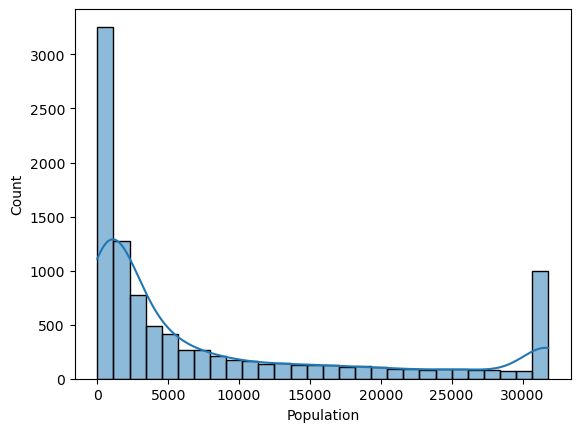

In [19]:
#identification of distribution via univariate statistics for quantitative explanatory variables via histogram

sns.histplot(data.Population, kde=True)

<AxesSubplot: xlabel='Children', ylabel='Count'>

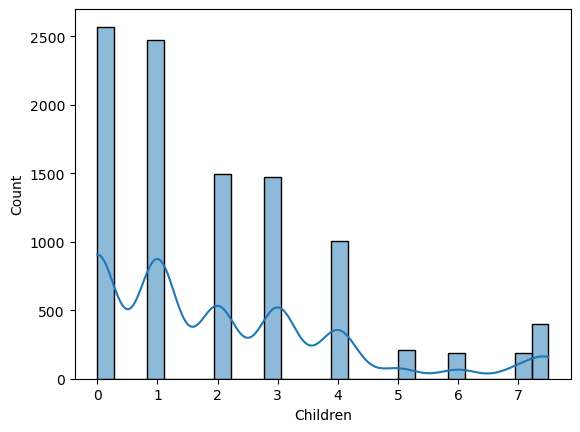

In [20]:
sns.histplot(data.Children, kde=True)

<AxesSubplot: xlabel='Age', ylabel='Count'>

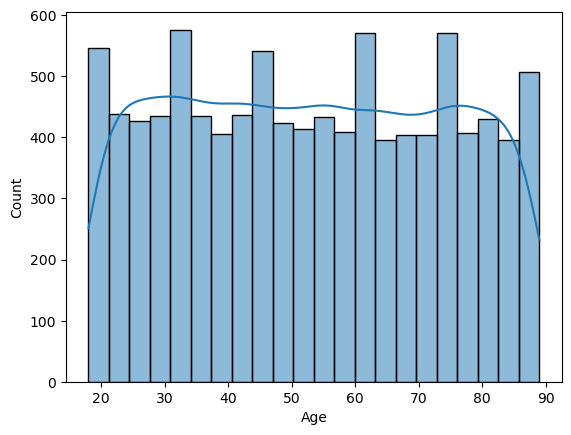

In [21]:
sns.histplot(data.Age, kde=True)

<AxesSubplot: xlabel='Income', ylabel='Count'>

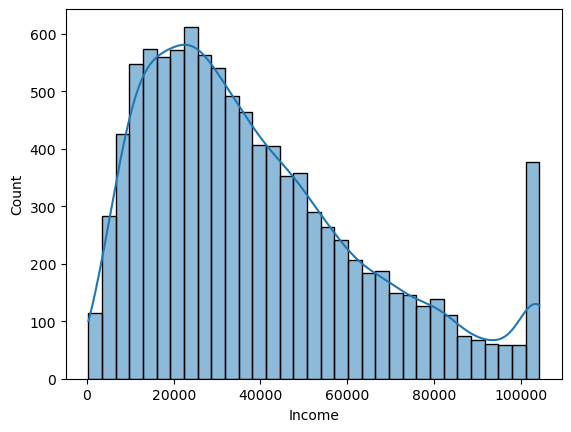

In [22]:
sns.histplot(data.Income, kde=True)

<AxesSubplot: xlabel='Tenure', ylabel='Count'>

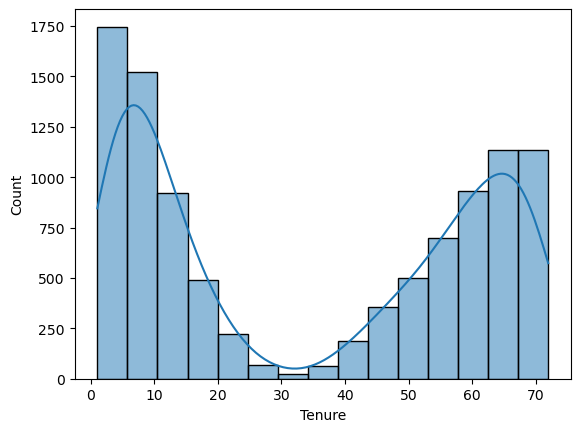

In [23]:
sns.histplot(data.Tenure, kde=True) 

<AxesSubplot: xlabel='Area'>

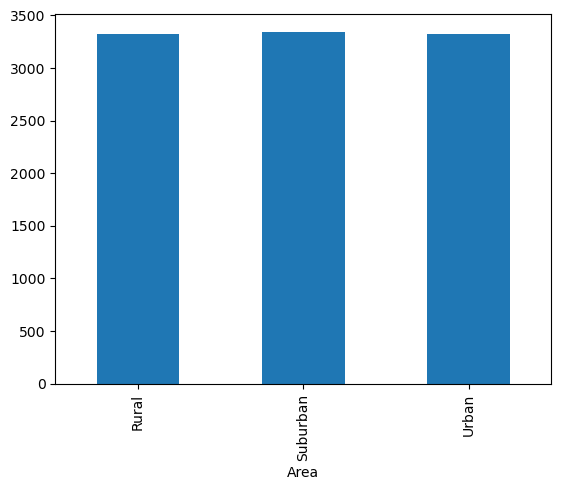

In [24]:
#identification of distribution via univariate statistics for categorical variables via barplot

groupedArea= data.groupby(by='Area').size()
groupedArea
%matplotlib inline
groupedArea.plot.bar()

<AxesSubplot: xlabel='Marital'>

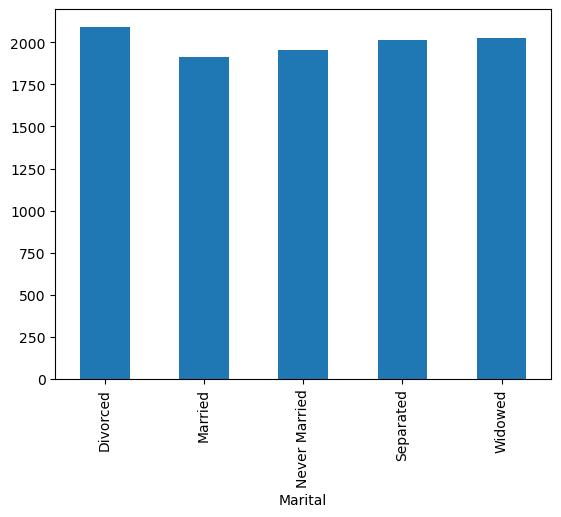

In [25]:
groupedMarital = data.groupby(by='Marital').size()
groupedMarital
%matplotlib inline
groupedMarital.plot.bar()

<AxesSubplot: xlabel='Gender'>

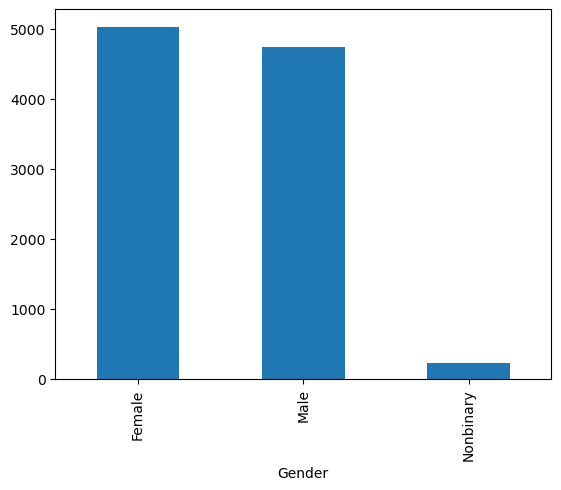

In [26]:
groupedGender = data.groupby(by='Gender').size()
groupedGender
%matplotlib inline
groupedGender.plot.bar()

<AxesSubplot: xlabel='Churn'>

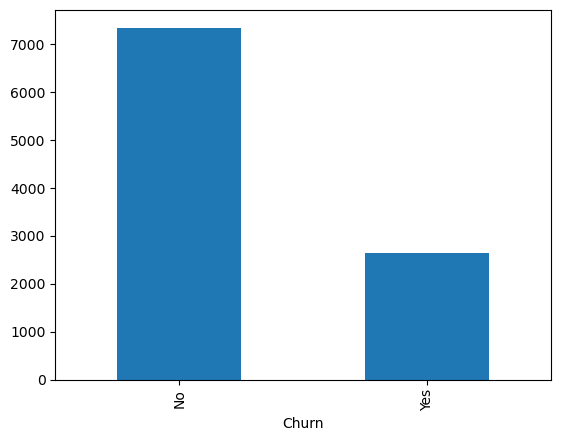

In [27]:
groupedChurn = data.groupby(by='Churn').size()
groupedChurn
%matplotlib inline
groupedChurn.plot.bar()

<AxesSubplot: xlabel='Techie'>

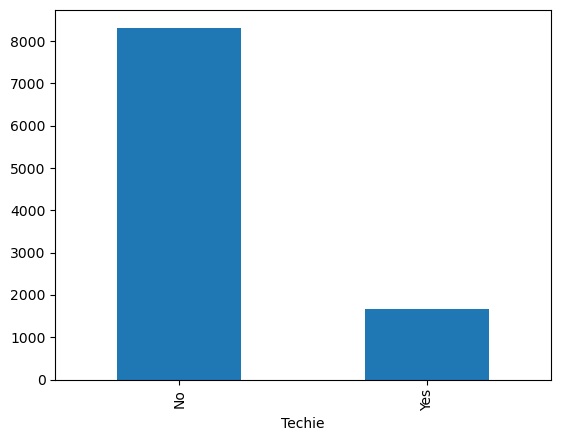

In [28]:
groupedTechie = data.groupby(by='Techie').size()
groupedTechie
%matplotlib inline
groupedTechie.plot.bar()

<AxesSubplot: xlabel='Contract'>

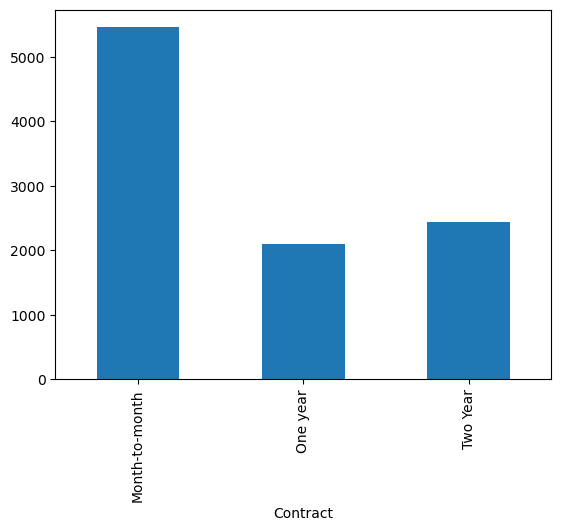

In [29]:
groupedContract = data.groupby(by='Contract').size()
groupedContract
%matplotlib inline
groupedContract.plot.bar()

<AxesSubplot: xlabel='Port_modem'>

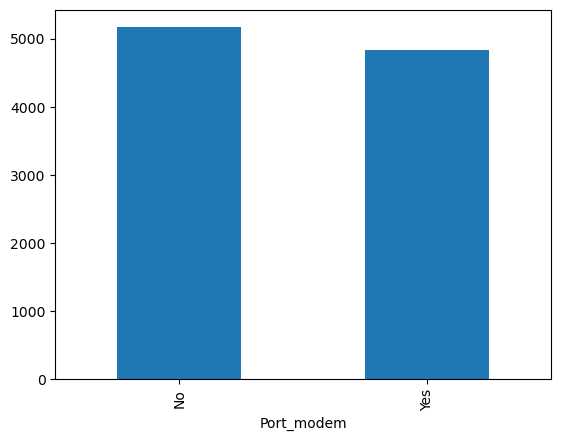

In [30]:
groupedPort = data.groupby(by='Port_modem').size()
groupedPort
%matplotlib inline
groupedPort.plot.bar()

<AxesSubplot: xlabel='Tablet'>

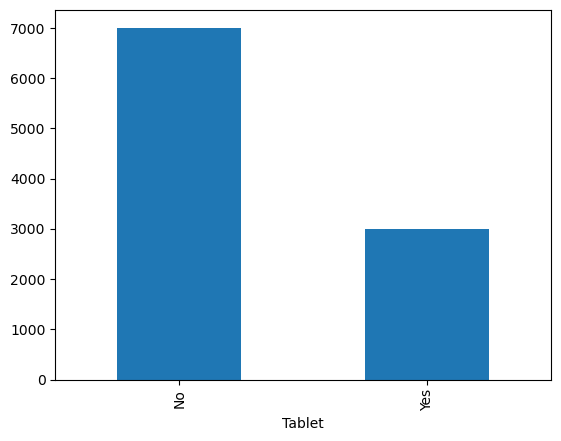

In [31]:
groupedTablet = data.groupby(by='Tablet').size()
groupedTablet
%matplotlib inline
groupedTablet.plot.bar()

<AxesSubplot: xlabel='InternetService'>

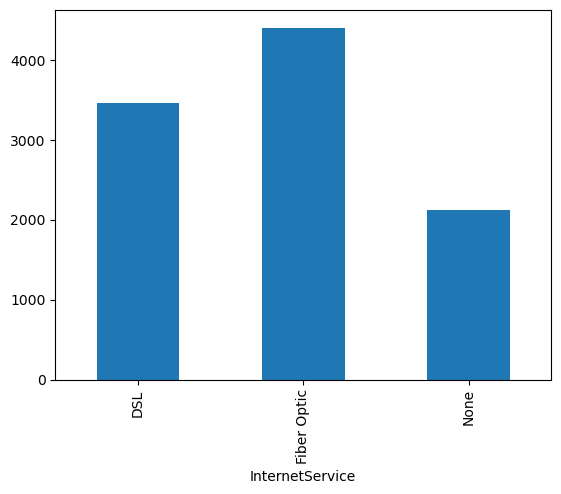

In [32]:
groupedInternetService = data.groupby(by='InternetService').size()
groupedInternetService
%matplotlib inline
groupedInternetService.plot.bar()

<AxesSubplot: xlabel='Phone'>

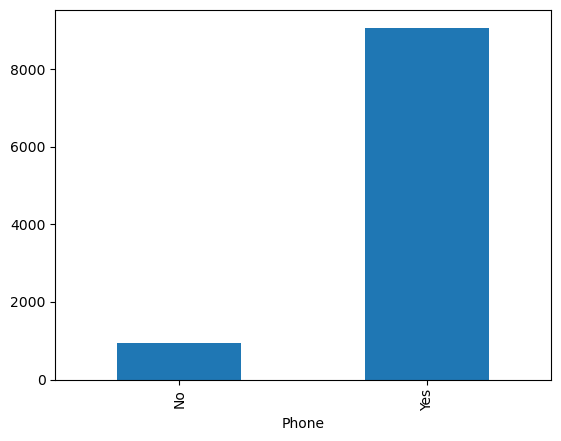

In [33]:
groupedPhone = data.groupby(by='Phone').size()
groupedPhone
%matplotlib inline
groupedPhone.plot.bar()

<AxesSubplot: xlabel='Multiple'>

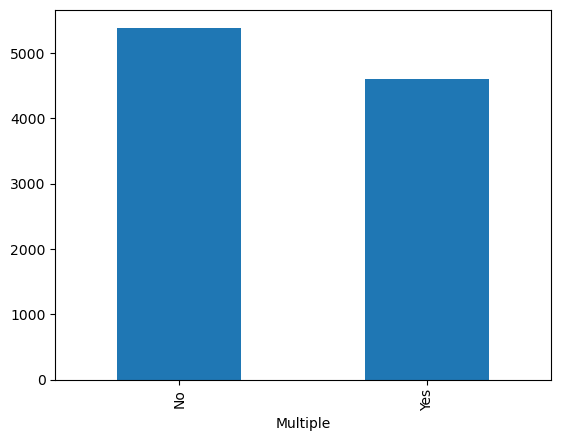

In [34]:
groupedMultiple = data.groupby(by='Multiple').size()
groupedMultiple
%matplotlib inline
groupedMultiple.plot.bar()

<AxesSubplot: xlabel='OnlineSecurity'>

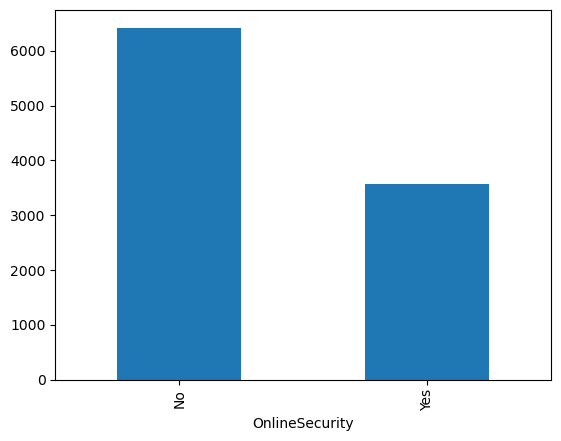

In [35]:
groupedSecurity = data.groupby(by='OnlineSecurity').size()
groupedSecurity
%matplotlib inline
groupedSecurity.plot.bar()

<AxesSubplot: xlabel='OnlineBackup'>

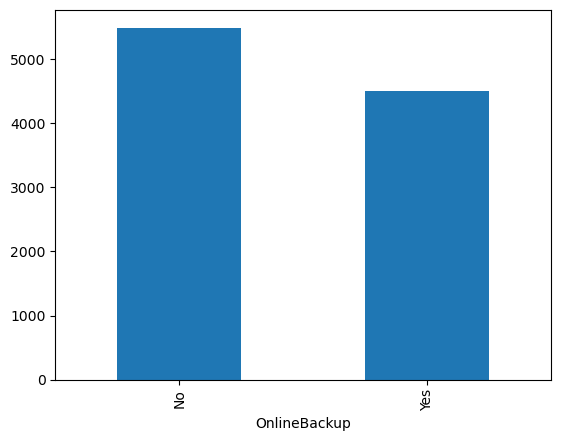

In [36]:
groupedBackup = data.groupby(by='OnlineBackup').size()
groupedBackup
%matplotlib inline
groupedBackup.plot.bar()

<AxesSubplot: xlabel='DeviceProtection'>

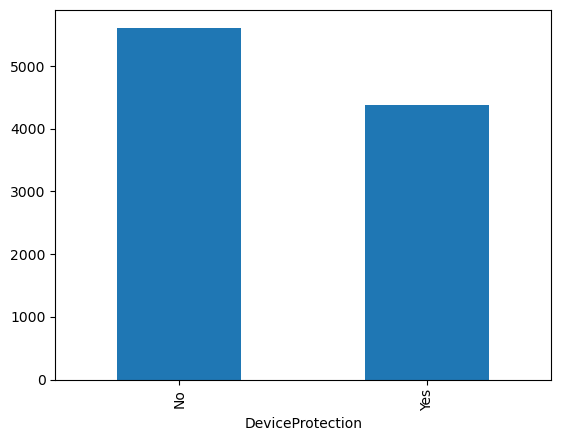

In [37]:
groupedDevice = data.groupby(by='DeviceProtection').size()
groupedDevice
%matplotlib inline
groupedDevice.plot.bar()

<AxesSubplot: xlabel='TechSupport'>

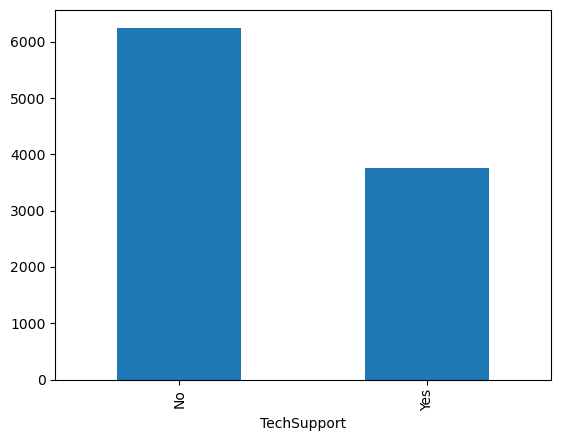

In [38]:
groupedSupport = data.groupby(by='TechSupport').size()
groupedSupport
%matplotlib inline
groupedSupport.plot.bar()

<AxesSubplot: xlabel='StreamingTV'>

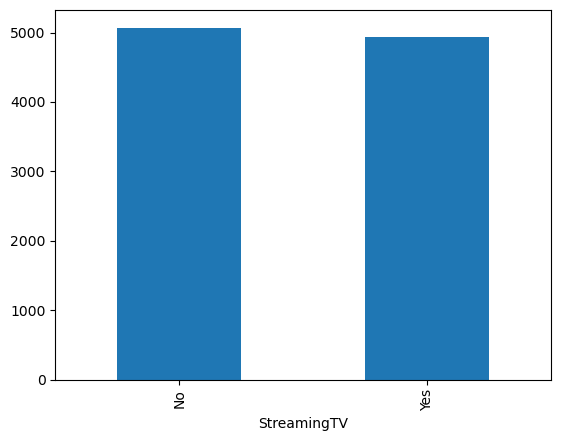

In [39]:
groupedStreamingTV = data.groupby(by='StreamingTV').size()
groupedStreamingTV 
%matplotlib inline
groupedStreamingTV.plot.bar()

<AxesSubplot: xlabel='StreamingMovies'>

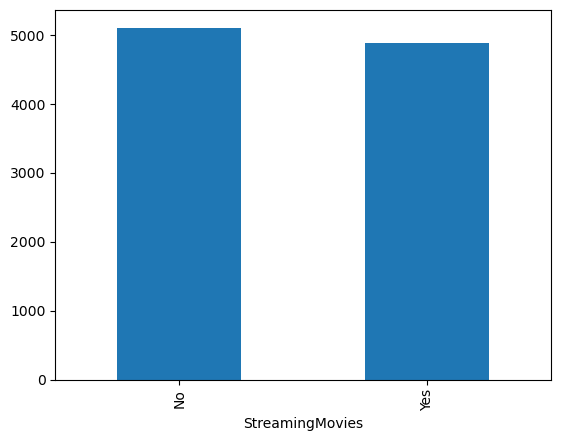

In [40]:
groupedStreamingMovies = data.groupby(by='StreamingMovies').size()
groupedStreamingMovies
%matplotlib inline
groupedStreamingMovies.plot.bar()

<AxesSubplot: xlabel='PaperlessBilling'>

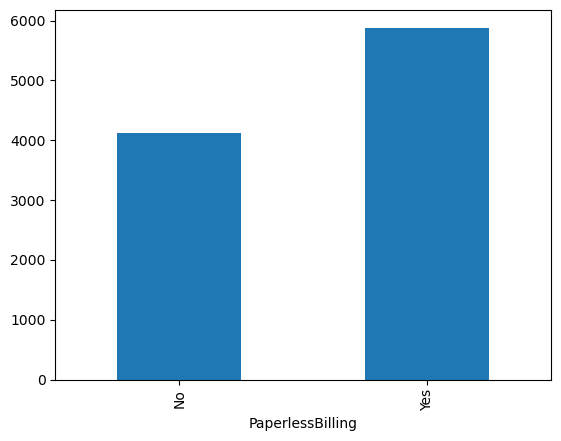

In [41]:
groupedBilling = data.groupby(by='PaperlessBilling').size()
groupedBilling
%matplotlib inline
groupedBilling.plot.bar()

<AxesSubplot: xlabel='PaymentMethod'>

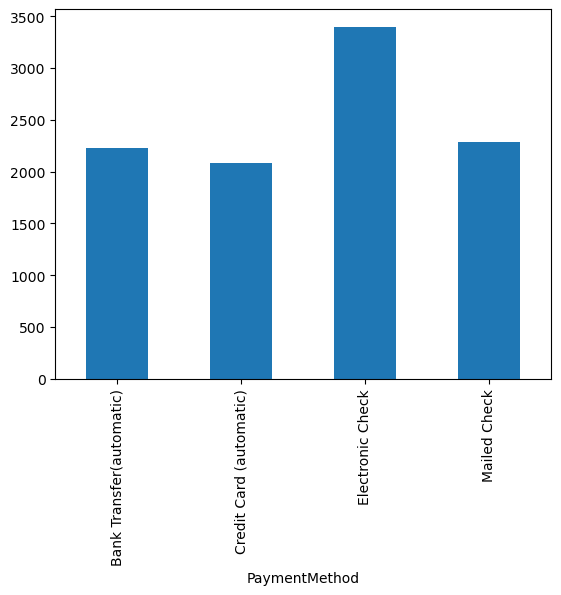

In [42]:
groupedPayment = data.groupby(by='PaymentMethod').size()
groupedPayment
%matplotlib inline
groupedPayment.plot.bar()

C:\Users\alexa\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 0.5, 'Population')

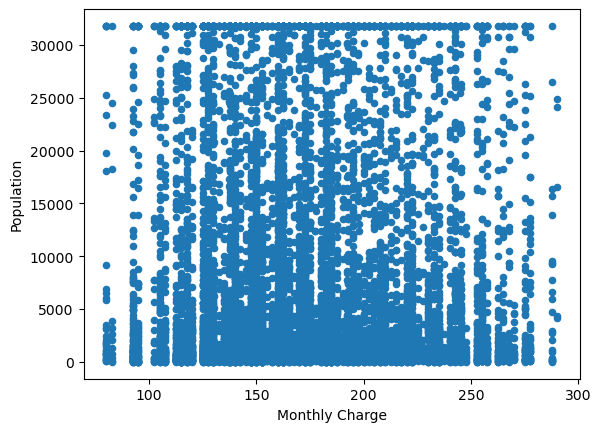

In [43]:
#identification of distributions via bivariate statistics 
# 2 continuous variables via scatterplot
pm_scatter = data.plot.scatter(x='MonthlyCharge', y='Population')
pm_scatter.set_xlabel('Monthly Charge')
pm_scatter.set_ylabel('Population')

Text(0, 0.5, 'Children')

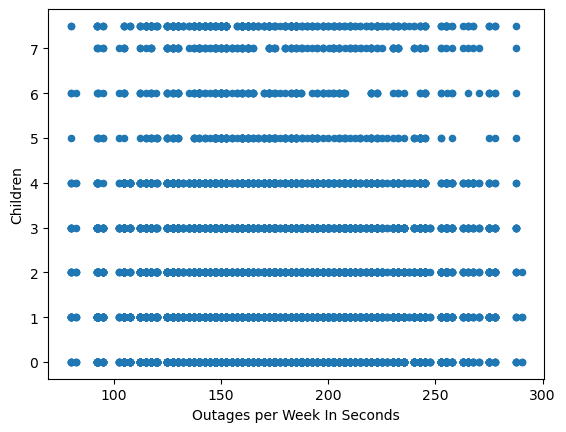

In [44]:
cm_scatter = data.plot.scatter(x='MonthlyCharge', y='Children')
cm_scatter.set_xlabel('Outages per Week In Seconds')
cm_scatter.set_ylabel('Children')

Text(0, 0.5, 'Age')

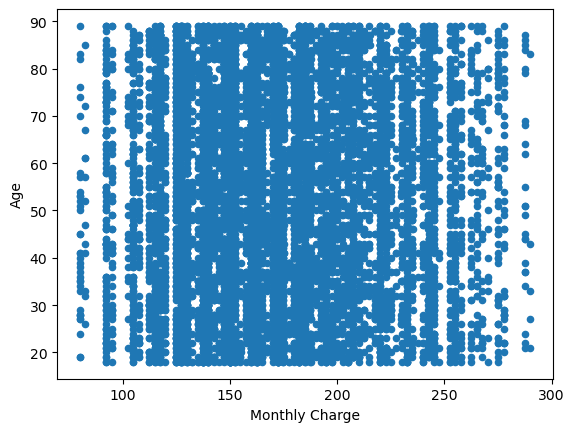

In [45]:
am_scatter = data.plot.scatter(x='MonthlyCharge', y='Age')
am_scatter.set_xlabel('Monthly Charge')
am_scatter.set_ylabel('Age')

Text(0, 0.5, 'Income')

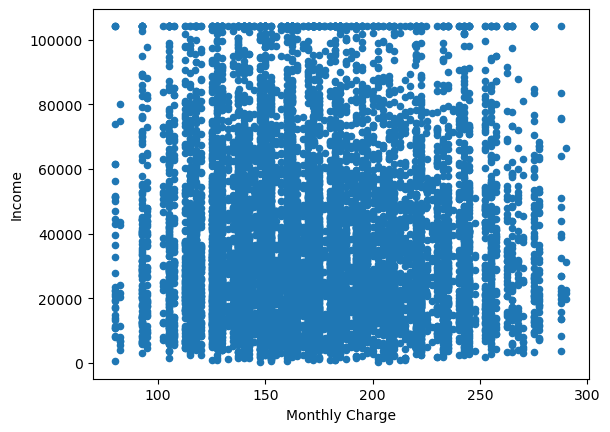

In [46]:
im_scatter = data.plot.scatter(x='MonthlyCharge', y='Income')
im_scatter.set_xlabel('Monthly Charge')
im_scatter.set_ylabel('Income')

Text(0, 0.5, 'Tenure')

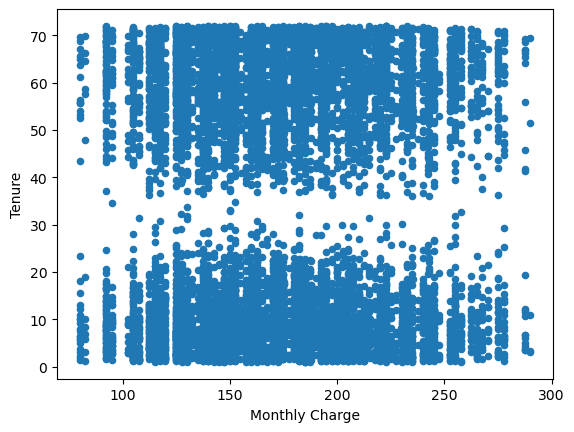

In [47]:
tm_scatter = data.plot.scatter(x='MonthlyCharge', y='Tenure')
tm_scatter.set_xlabel('Monthly Charge')
tm_scatter.set_ylabel('Tenure')

In [48]:
#identification of distributions via bivariate statistics via one way Anova /histogram visualizations

def anova(feature, label):
    groups = data[feature].unique()
    group_values = []
    for group in groups:
        group_values .append(data[data[feature]==group][label])
    return stats.f_oneway(*group_values)


In [49]:
anova('Area', 'MonthlyCharge')

F_onewayResult(statistic=0.103728065024303, pvalue=0.9014713756427815)

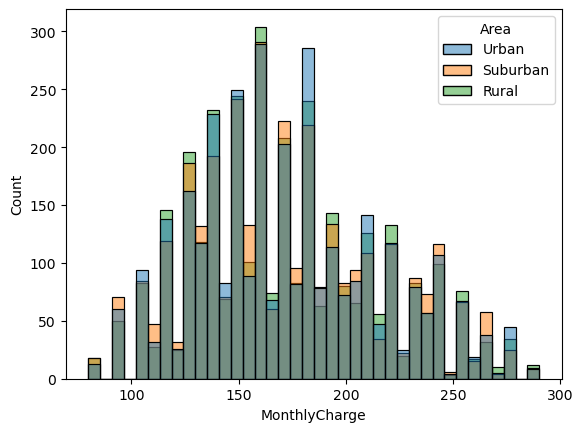

In [50]:
sns.histplot(data=data, x='MonthlyCharge', hue='Area', kde=False)
plt.show()

In [51]:
anova('Marital', 'MonthlyCharge')

F_onewayResult(statistic=0.5735193600068232, pvalue=0.6818537061016405)

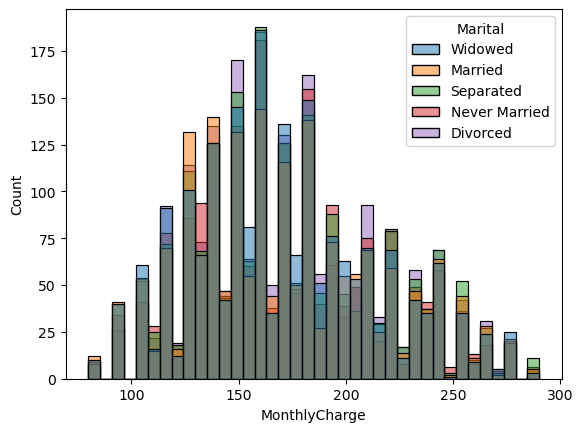

In [52]:
sns.histplot(data=data, x='MonthlyCharge', hue='Marital', kde=False)
plt.show()

In [53]:
anova('Gender', 'MonthlyCharge')

F_onewayResult(statistic=0.4427132769463601, pvalue=0.6423039321761266)

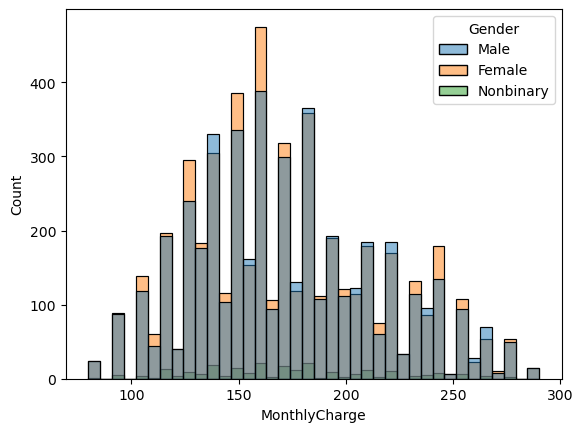

In [54]:
sns.histplot(data=data, x='MonthlyCharge', hue='Gender', kde=False)
plt.show()

In [55]:
anova('Churn', 'MonthlyCharge')

F_onewayResult(statistic=1615.1940392182648, pvalue=0.0)

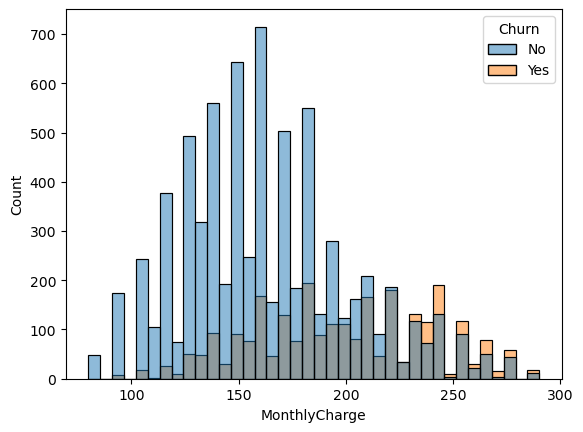

In [56]:
sns.histplot(data=data, x='MonthlyCharge', hue='Churn', kde=False)
plt.show()

In [57]:
anova('Techie', 'MonthlyCharge')

F_onewayResult(statistic=0.5161180276428803, pvalue=0.47251912274138896)

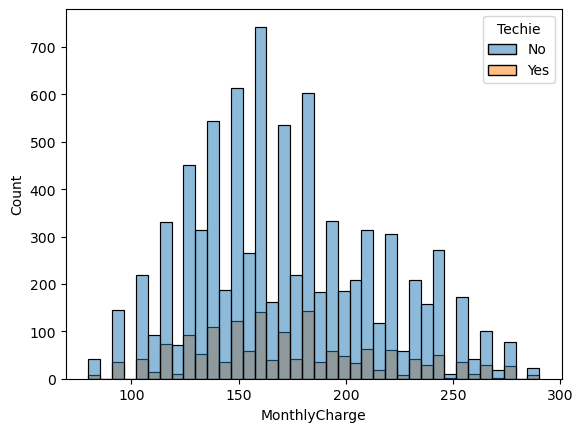

In [58]:
sns.histplot(data=data, x='MonthlyCharge', hue='Techie', kde=False)
plt.show()

In [59]:
anova('Contract', 'MonthlyCharge')

F_onewayResult(statistic=0.9876286273257879, pvalue=0.37249522134022617)

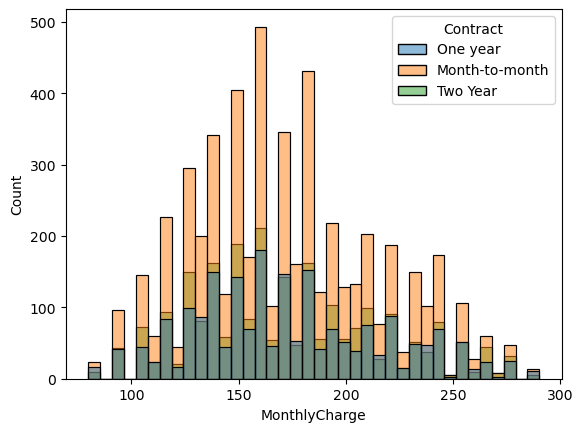

In [60]:
sns.histplot(data=data, x='MonthlyCharge', hue='Contract', kde=False)
plt.show()

In [61]:
anova('Port_modem', 'MonthlyCharge')

F_onewayResult(statistic=0.0002423751239766553, pvalue=0.9875790252356098)

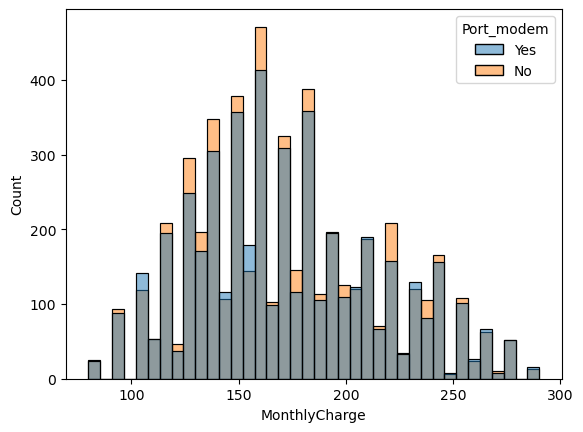

In [62]:
sns.histplot(data=data, x='MonthlyCharge', hue='Port_modem', kde=False)
plt.show()

In [63]:
anova('Tablet', 'MonthlyCharge')

F_onewayResult(statistic=0.5299539211519984, pvalue=0.46664328080158246)

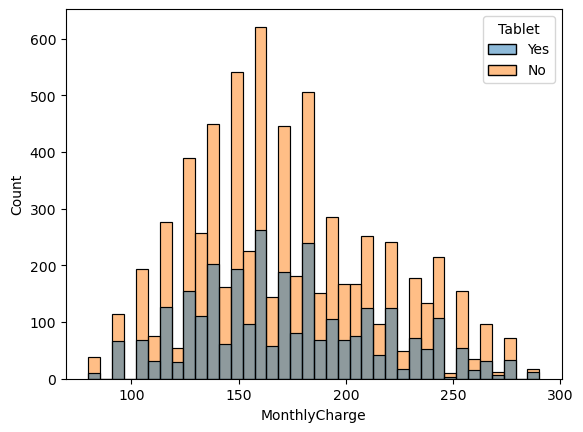

In [64]:
sns.histplot(data=data, x='MonthlyCharge', hue='Tablet', kde=False)
plt.show()

In [65]:
anova('InternetService', 'MonthlyCharge')

F_onewayResult(statistic=532.6418693576522, pvalue=1.550441148202294e-220)

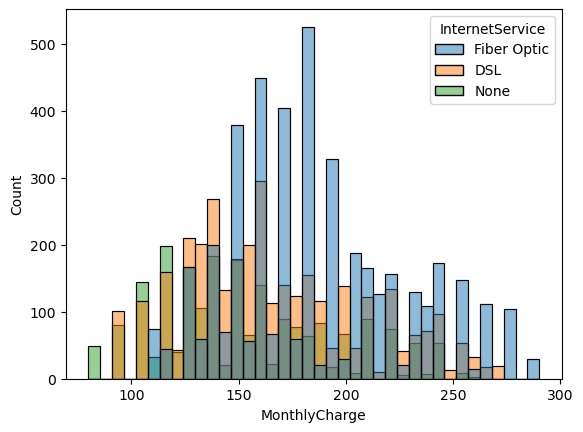

In [66]:
sns.histplot(data=data, x='MonthlyCharge', hue='InternetService', kde=False)
plt.show()

In [67]:
anova('Phone', 'MonthlyCharge')

F_onewayResult(statistic=3.6018697419456513, pvalue=0.057743401981852384)

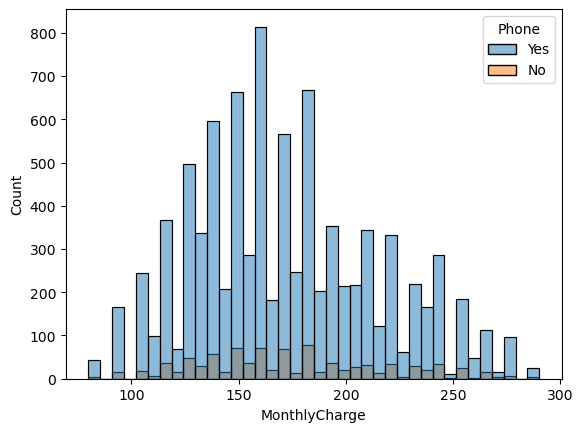

In [68]:
sns.histplot(data=data, x='MonthlyCharge', hue='Phone', kde=False)
plt.show()

In [69]:
anova('Multiple', 'MonthlyCharge')

F_onewayResult(statistic=1750.2519831572727, pvalue=0.0)

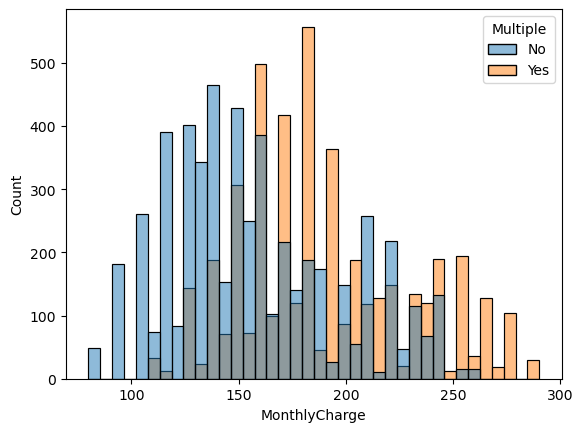

In [70]:
sns.histplot(data=data, x='MonthlyCharge', hue='Multiple', kde=False)
plt.show()

In [71]:
anova('OnlineSecurity', 'MonthlyCharge')

F_onewayResult(statistic=22.83294385591984, pvalue=1.7922673421231386e-06)

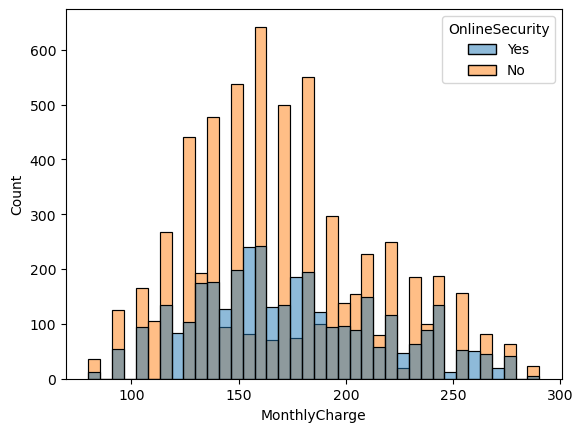

In [72]:
sns.histplot(data=data, x='MonthlyCharge', hue='OnlineSecurity', kde=False)
plt.show()

In [73]:
anova('OnlineBackup', 'MonthlyCharge')

F_onewayResult(statistic=721.5203386837194, pvalue=1.608783095447509e-153)

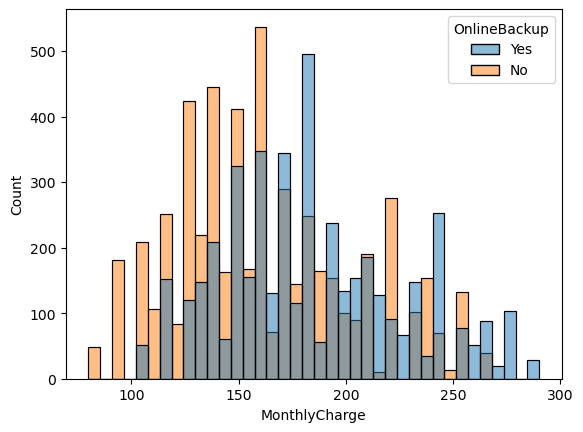

In [74]:
sns.histplot(data=data, x='MonthlyCharge', hue='OnlineBackup', kde=False)
plt.show()

In [75]:
anova('DeviceProtection', 'MonthlyCharge')

F_onewayResult(statistic=271.9759582091938, pvalue=2.624785165819671e-60)

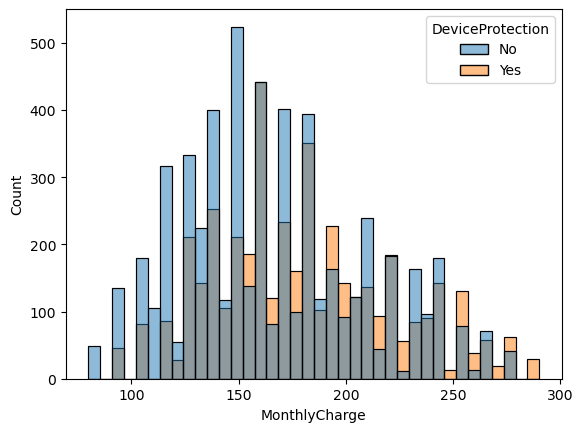

In [76]:
sns.histplot(data=data, x='MonthlyCharge', hue='DeviceProtection', kde=False)
plt.show()

In [77]:
anova('TechSupport', 'MonthlyCharge')

F_onewayResult(statistic=146.82000446459222, pvalue=1.4759008600208933e-33)

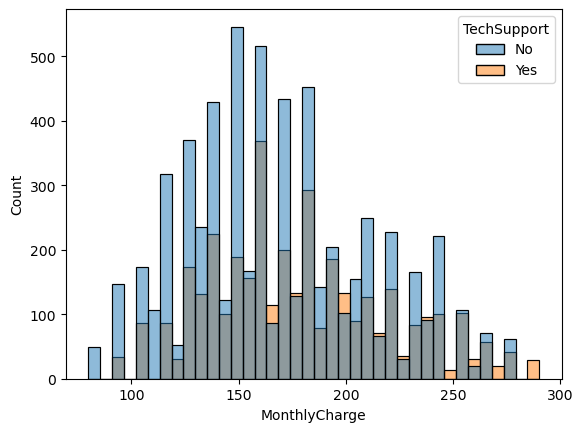

In [78]:
sns.histplot(data=data, x='MonthlyCharge', hue='TechSupport', kde=False)
plt.show()

In [79]:
anova('StreamingTV', 'MonthlyCharge')

F_onewayResult(statistic=3030.832978655445, pvalue=0.0)

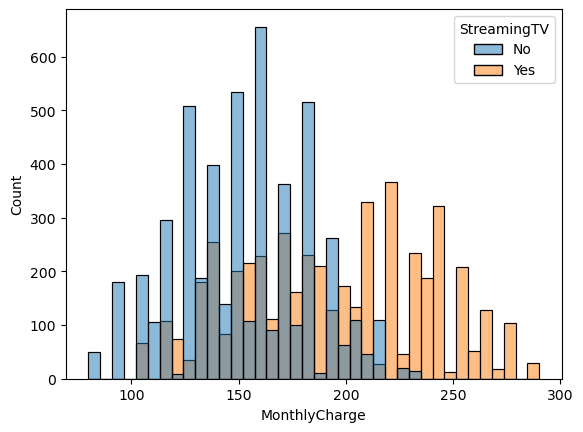

In [80]:
sns.histplot(data=data, x='MonthlyCharge', hue='StreamingTV', kde=False)
plt.show()

In [81]:
anova('StreamingMovies', 'MonthlyCharge')

F_onewayResult(statistic=5866.89985084985, pvalue=0.0)

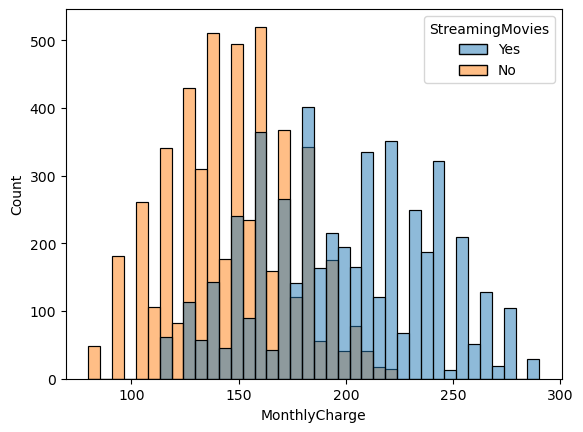

In [82]:
sns.histplot(data=data, x='MonthlyCharge', hue='StreamingMovies', kde=False)
plt.show()

In [83]:
anova('PaperlessBilling', 'MonthlyCharge')

F_onewayResult(statistic=0.018162589890714235, pvalue=0.8927975036274793)

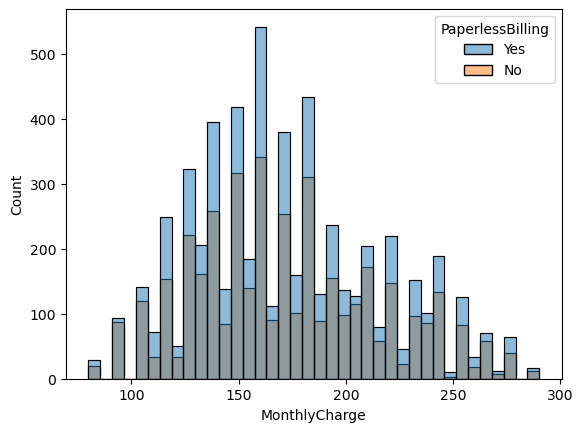

In [84]:
sns.histplot(data=data, x='MonthlyCharge', hue='PaperlessBilling', kde=False)
plt.show()

In [85]:
anova('PaymentMethod', 'MonthlyCharge')

F_onewayResult(statistic=0.6704200251897235, pvalue=0.5700939802234821)

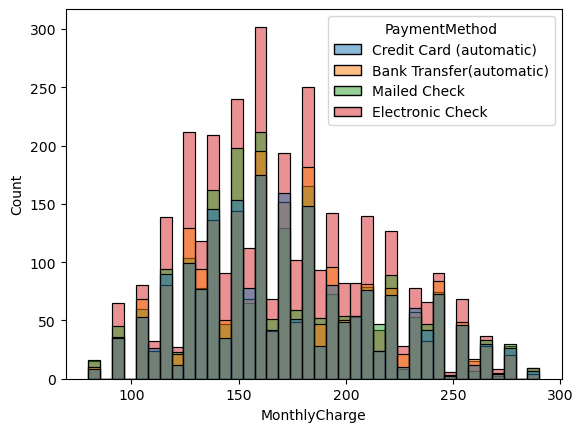

In [86]:
sns.histplot(data=data, x='MonthlyCharge', hue='PaymentMethod', kde=False)
plt.show()

In [87]:
#re-expression of categorical variables
#convert ordinal categorical to numerical

data['Churn']=data['Churn'].astype('category')
data['Churn']=data['Churn'].cat.codes

In [88]:
data['Techie']=data['Techie'].astype('category')
data['Techie']=data['Techie'].cat.codes

In [89]:
data['Port_modem']=data['Port_modem'].astype('category')
data['Port_modem']=data['Port_modem'].cat.codes

In [90]:
data['Tablet']=data['Tablet'].astype('category')
data['Tablet']=data['Tablet'].cat.codes

In [91]:
data['Phone']=data['Phone'].astype('category')
data['Phone']=data['Phone'].cat.codes

In [92]:
data['Multiple']=data['Multiple'].astype('category')
data['Multiple']=data['Multiple'].cat.codes

In [93]:
data['OnlineSecurity']=data['OnlineSecurity'].astype('category')
data['OnlineSecurity']=data['OnlineSecurity'].cat.codes

In [94]:
data['OnlineBackup']=data['OnlineBackup'].astype('category')
data['OnlineBackup']=data['OnlineBackup'].cat.codes

In [95]:
data['DeviceProtection']=data['DeviceProtection'].astype('category')
data['DeviceProtection']=data['DeviceProtection'].cat.codes

In [96]:
data['TechSupport']=data['TechSupport'].astype('category')
data['TechSupport']=data['TechSupport'].cat.codes

In [97]:
data['StreamingTV']=data['StreamingTV'].astype('category')
data['StreamingTV']=data['StreamingTV'].cat.codes

In [98]:
data['StreamingMovies']=data['StreamingMovies'].astype('category')
data['StreamingMovies']=data['StreamingMovies'].cat.codes

In [99]:
data['PaperlessBilling']=data['PaperlessBilling'].astype('category')
data['PaperlessBilling']=data['PaperlessBilling'].cat.codes

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Population        10000 non-null  float64
 1   Area              10000 non-null  object 
 2   Children          10000 non-null  float64
 3   Age               10000 non-null  int64  
 4   Income            10000 non-null  float64
 5   Marital           10000 non-null  object 
 6   Gender            10000 non-null  object 
 7   Churn             10000 non-null  int8   
 8   Techie            10000 non-null  int8   
 9   Contract          10000 non-null  object 
 10  Port_modem        10000 non-null  int8   
 11  Tablet            10000 non-null  int8   
 12  InternetService   10000 non-null  object 
 13  Phone             10000 non-null  int8   
 14  Multiple          10000 non-null  int8   
 15  OnlineSecurity    10000 non-null  int8   
 16  OnlineBackup      10000 non-null  int8   

In [101]:
#utilizing get_dummies to convert nominal categorical to numerical

data= pd.get_dummies(data, columns=['Area', 'Marital', 'Gender', 'Contract',
                                    'InternetService', 'PaymentMethod'], prefix_sep=" " , drop_first=True)

In [102]:
data.head()

,Population,Children,Age,Income,Churn,Techie,Port_modem,Tablet,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Tenure,MonthlyCharge,Area Suburban,Area Urban,Marital Married,Marital Never Married,Marital Separated,Marital Widowed,Gender Male,Gender Nonbinary,Contract One year,Contract Two Year,InternetService Fiber Optic,InternetService None,PaymentMethod Credit Card (automatic),PaymentMethod Electronic Check,PaymentMethod Mailed Check
0,38.0,0.0,68,28561.99,0,0,1,1,1,0,1,1,0,0,0,1,1,6.795513,172.455519,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
1,10446.0,1.0,27,21704.77,1,1,0,1,1,1,1,0,0,0,1,1,1,1.156681,242.632554,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,3735.0,4.0,50,9609.57,0,1,1,0,1,1,0,0,0,0,0,1,1,15.754144,159.947583,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0
3,13863.0,1.0,48,18925.23,0,1,0,0,1,0,1,0,0,0,1,0,1,17.087227,119.956840,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4,11352.0,0.0,83,40074.19,1,0,1,0,0,0,0,0,0,1,1,0,0,1.670972,149.948316,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  float64
 1   Children                               10000 non-null  float64
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Churn                                  10000 non-null  int8   
 5   Techie                                 10000 non-null  int8   
 6   Port_modem                             10000 non-null  int8   
 7   Tablet                                 10000 non-null  int8   
 8   Phone                                  10000 non-null  int8   
 9   Multiple                               10000 non-null  int8   
 10  OnlineSecurity                         10000 non-null  int8   
 11  Onl

In [104]:
data.columns

Index(['Population', 'Children', 'Age', 'Income', 'Churn', 'Techie',
       'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Tenure', 'MonthlyCharge',
       'Area Suburban', 'Area Urban', 'Marital Married',
       'Marital Never Married', 'Marital Separated', 'Marital Widowed',
       'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None', 'PaymentMethod Credit Card (automatic)',
       'PaymentMethod Electronic Check', 'PaymentMethod Mailed Check'],
      dtype='object')

In [105]:
#VIF to check for multicollinearity, if greater than 10,  drop variables.

X= data[['Population', 'Children', 'Age', 'Income', 'Churn', 'Techie',
       'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Tenure', 'Area Suburban', 'Area Urban',
        'Marital Married', 'Marital Never Married', 'Marital Separated', 
        'Marital Widowed', 'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None', 'PaymentMethod Credit Card (automatic)',
       'PaymentMethod Electronic Check', 'PaymentMethod Mailed Check']]

In [106]:
vif_data = pd.DataFrame()
vif_data["Explanatory Variables"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

vif_data["VIF"]=round(vif_data["VIF"],2)
vif_data=vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)


                    Explanatory Variables   VIF
8                                   Phone  8.41
2                                     Age  6.53
17                                 Tenure  3.69
3                                  Income  3.16
4                                   Churn  2.56
31         PaymentMethod Electronic Check  2.39
16                       PaperlessBilling  2.37
15                        StreamingMovies  2.26
28            InternetService Fiber Optic  2.21
14                            StreamingTV  2.17
1                                Children  2.00
19                             Area Urban  1.94
18                          Area Suburban  1.94
32             PaymentMethod Mailed Check  1.92
24                            Gender Male  1.91
6                              Port_modem  1.90
9                                Multiple  1.89
23                        Marital Widowed  1.88
22                      Marital Separated  1.88
30  PaymentMethod Credit Card (automatic

In [107]:
#regression model
data['const']=1
y= data['MonthlyCharge']
X= data[['Population', 'Children', 'Age', 'Income', 'Churn', 'Techie',
       'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Tenure', 'Area Suburban', 'Area Urban',
        'Marital Married', 'Marital Never Married', 'Marital Separated', 
        'Marital Widowed', 'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None', 'PaymentMethod Credit Card (automatic)',
       'PaymentMethod Electronic Check', 'PaymentMethod Mailed Check', 'const']]

In [108]:
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     7040.
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:56:30   Log-Likelihood:                -35833.
No. Observations:               10000   AIC:                         7.173e+04
Df Residuals:                    9966   BIC:                         7.198e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [109]:
#reduced regression model utilizing the wrapper backward stepwise elimination, 
#only keeping values that have a p-value of less then 0.05

data['const']=1
y= data['MonthlyCharge']
rX= data[['Churn','Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Tenure', 'Contract One year', 'Contract Two Year',
        'InternetService Fiber Optic', 'InternetService None', 'const']]

reduced_model = sm.OLS(y, rX)
redu_results = reduced_model.fit()
print(redu_results.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 1.788e+04
Date:                Sat, 21 Jan 2023   Prob (F-statistic):               0.00
Time:                        11:56:31   Log-Likelihood:                -35840.
No. Observations:               10000   AIC:                         7.171e+04
Df Residuals:                    9986   BIC:                         7.181e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Churn             

In [110]:
#Residual Standard Error of model
mse = results.mse_resid
print('Initial model mse: ', mse)

Initial model mse:  76.1028785896427


In [111]:
RSE = np.sqrt(mse)
print("Initial model Residual Standard Error: ", RSE)

Initial model Residual Standard Error:  8.723696383394065


In [112]:
r_mse = redu_results.mse_resid
print('Reduced model mse: ', r_mse)

Reduced model mse:  76.06542091738008


In [113]:
r_RSE = np.sqrt(mse)
print("Reduced Model Residual Standard Error: ", r_RSE)

Reduced Model Residual Standard Error:  8.723696383394065


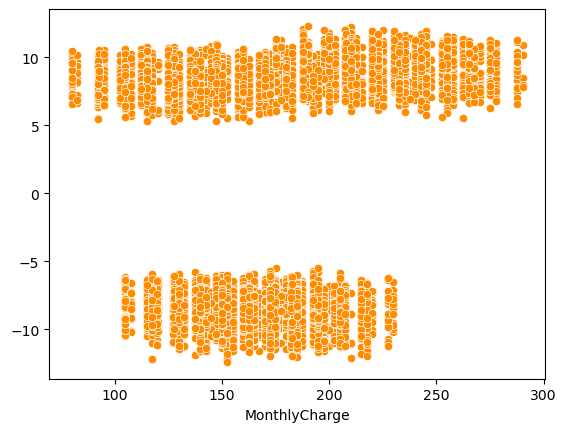

In [114]:
residuals = data["MonthlyCharge"] - results.predict(data[['Population', 'Children', 'Age', 'Income', 'Churn', 'Techie',
       'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Tenure', 'Area Suburban', 'Area Urban',
        'Marital Married', 'Marital Never Married', 'Marital Separated', 
        'Marital Widowed', 'Gender Male', 'Gender Nonbinary', 'Contract One year',
       'Contract Two Year', 'InternetService Fiber Optic',
       'InternetService None', 'PaymentMethod Credit Card (automatic)',
       'PaymentMethod Electronic Check', 'PaymentMethod Mailed Check', 'const']])
sns.scatterplot(x=data["MonthlyCharge"], y=residuals, color='darkorange')
plt.show()

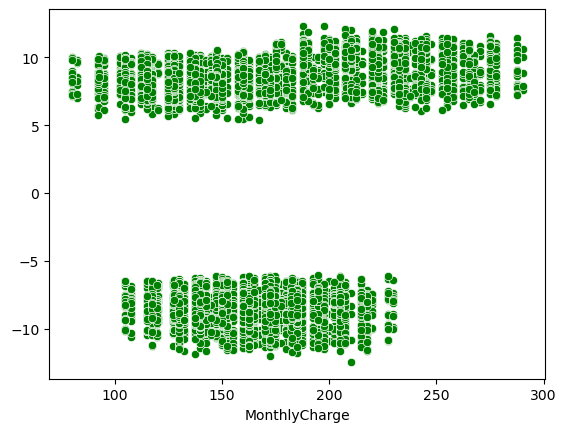

In [115]:
residuals = data["MonthlyCharge"] - redu_results.predict(data[['Churn','Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Tenure', 'Contract One year', 'Contract Two Year',
        'InternetService Fiber Optic', 'InternetService None', 'const']])
sns.scatterplot(x=data["MonthlyCharge"], y=residuals, color='green')
plt.show()

In [116]:
#multiple linear regression followed by visualizations Using train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [117]:
lr = LinearRegression()

In [118]:
lr.fit(X_train, y_train)
c = lr.intercept_
c

82.45076910966257

In [119]:
m= lr.coef_
m

array([ 1.87195374e-06,  1.79058747e-02,  7.54573972e-03,  4.34189303e-06,
        3.66446385e+00, -1.00222184e-01, -3.74778300e-01, -3.52422197e-01,
       -3.84066346e-01,  3.19755076e+01,  2.75768503e+00,  2.25755375e+01,
        1.22664730e+01,  1.26680768e+01,  4.14116009e+01,  5.14090718e+01,
        2.75907427e-01,  3.05075296e-02,  2.89339690e-01,  8.76497427e-02,
        3.17833601e-01, -1.08059021e-01,  2.36898454e-04,  7.85640819e-02,
       -2.29681542e-01, -9.58122489e-01,  8.50723627e-01,  7.07665358e-01,
        2.00639459e+01, -1.28304523e+01, -1.97030510e-01, -1.30567528e-01,
        3.22677350e-02,  0.00000000e+00])

In [120]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([193.13841659, 155.08433269, 189.84100393, ..., 259.85926489,
       148.00924286, 183.14608288])

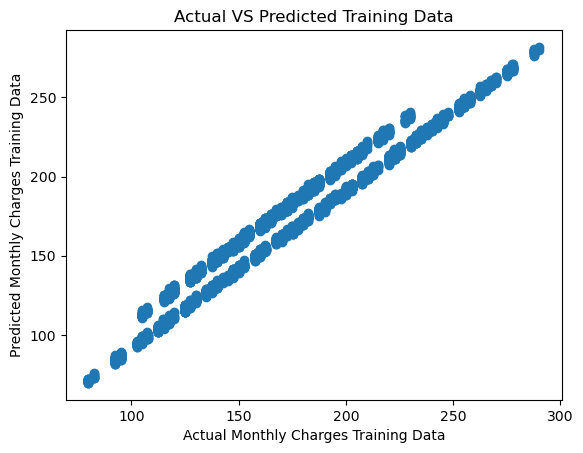

In [121]:
#residual plotting via scatterplot
#using training data
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Monthly Charges Training Data")
plt.ylabel("Predicted Monthly Charges Training Data")
plt.title("Actual VS Predicted Training Data")
plt.show()

In [122]:
r2_score(y_train, y_pred_train)

0.9589803022070595

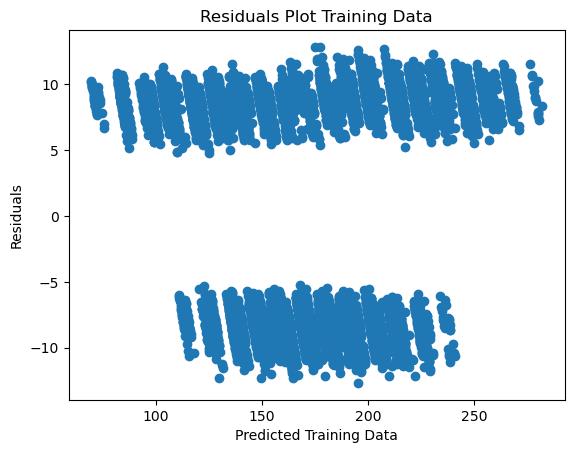

In [123]:
residuals= y_train - y_pred_train
plt.scatter(y_pred_train, residuals)
plt.xlabel("Predicted Training Data")
plt.ylabel("Residuals")
plt.title("Residuals Plot Training Data")
plt.show()

In [124]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([206.12133003, 136.00598038, 192.23821543, ..., 209.64744487,
       193.03145083, 142.90944207])

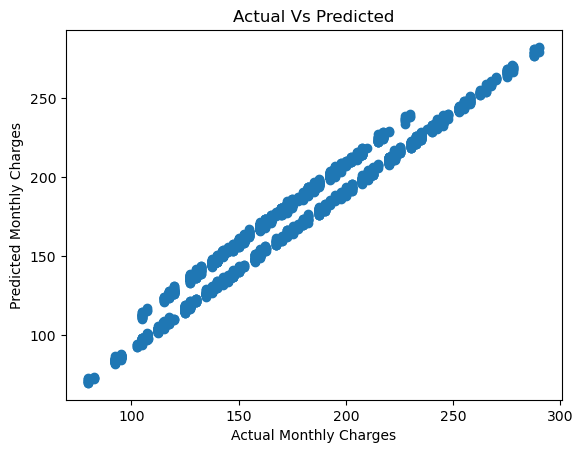

In [125]:
#residual plotting via scatterplot
#using actual test data
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Monthly Charges")
plt.ylabel("Predicted Monthly Charges")
plt.title("Actual Vs Predicted")
plt.show()

In [126]:
r2_score(y_test, y_pred_test)

0.9583606984066744

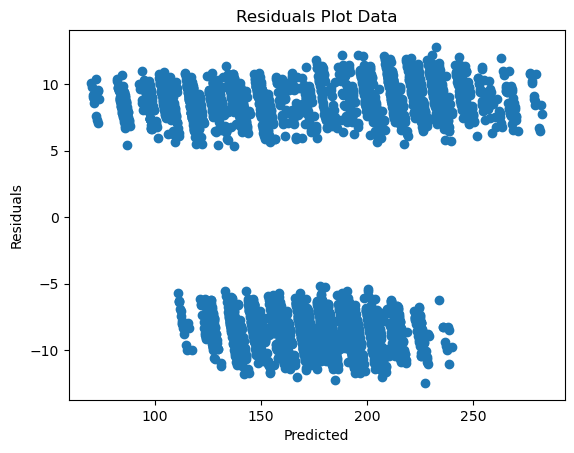

In [127]:
residuals= y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals Plot Data")
plt.show()

In [128]:
pred_y_data = pd.DataFrame({'Actual Charges': y_test, 'Predicted Charges': y_pred_test, 'Difference': y_test-y_pred_test})
pred_y_data[0:10000]

,Actual Charges,Predicted Charges,Difference
9394,197.487600,206.121330,-8.633730
898,144.960655,136.005980,8.954675
2398,200.132300,192.238215,7.894085
5906,184.964700,194.020228,-9.055528
2343,222.679200,212.012239,10.666961
...,...,...,...
4004,172.462400,177.644304,-5.181904
7375,147.456400,140.094587,7.361813
9307,202.443300,209.647445,-7.204145
8394,184.978500,193.031451,-8.052951


In [129]:
data.to_csv(r'AFCodeD208Task1_clean.csv')